
## Was the Number of Husky Adoption Affected by "Game of Thrones"?

In the summer of 2019, My daughter and I were looking for a dog to adopt.  We visited so many dog shelters to find our "dream dog".

We knew that the number of the Pit Bulls and Chihuahuas are quite high before we started our search, but we were surprised to find \
quite many Huskies.\
\
Several workers at the shelters told us that the number of Husky adoptions have gone up due to the popularities of the TV show,   Game of Thrones.  It was beyond belief that a TV show has such an effect.  Since then, I found many articles written about this strange phenomenon.  

I found an adoption number of the Austin Texas Animal Center, and thought I could find if this "trend" is a real thing.


##### "Game of Thrones" - original release : April 17, 2011 – May 19, 2019
[Wikipedia on **"Game of Thrones"**](https://en.wikipedia.org/wiki/Game_of_Thrones "Google's Homepage")

Data Source: **Austin TX Animal Center Stats**\
https://data.world/rebeccaclay/austin-tx-animal-center-stats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_out = pd.read_csv('Austin_Animal_Center_Outcomes.csv')
data_out.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,08/16/2020 11:38:00 AM,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [3]:
filter1 = (data_out['Outcome Type'] == 'Adoption') | (data_out['Outcome Type'] == 'Return to Owner')
data_out1 = data_out[filter1]

In [4]:
filter2 = data_out['Animal Type'] == 'Dog'
data_out2 = data_out1[filter2]

<ipython-input-4-570d8a3789af>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_out2 = data_out1[filter2]


In [5]:
df = data_out2[['Animal ID', 'DateTime', 'Breed']]

In [6]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%m/%d/%Y %H:%M:%S %p')  #'%Y-%m-%d %H:%M:%S'

df['Year'] = df['DateTime'].dt.year
#df['Month'] = df['DateTime'].dt.month

<ipython-input-6-f89ca0c836a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateTime'] = pd.to_datetime(df['DateTime'], format='%m/%d/%Y %H:%M:%S %p')  #'%Y-%m-%d %H:%M:%S'
<ipython-input-6-f89ca0c836a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['DateTime'].dt.year


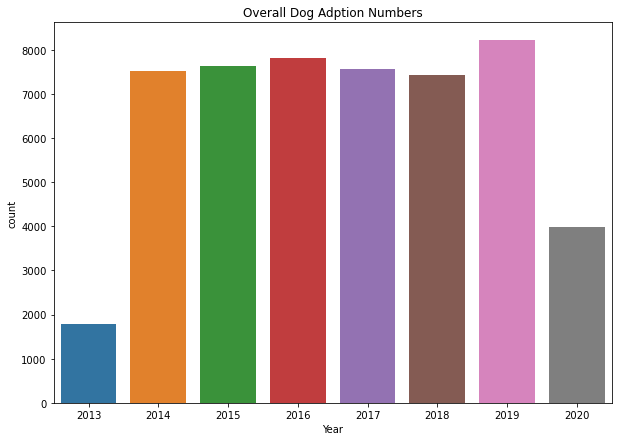

In [7]:
df_2020 = df[df['DateTime'] <= '01/01/2021']
fig, ax = plt.subplots(figsize=(10,7))
_= sns.countplot(data=df_2020, x="Year").set_title('Overall Dog Adption Numbers')

#### Not sure if the spike in the dog adoption overall number in 2013 and fall in 2020 is specific to this Animal Shelter, but the numbers are fairly steady between 2014 and 2019.

In [8]:
df = df_2020
dog_breed = df['Breed'].unique()

In [9]:
df_total = df.groupby('Year').agg('count').reset_index()
df_total2 = df_total[['Year', 'Animal ID']]
df_total2.rename(columns = {'Animal ID':'Total'}, inplace=True)

C:\Users\junko\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
dog_list = []
for dog in dog_breed:
    if "Husky" in dog:
        mix_kind = 'Husky Mix'
    elif 'Retriever' in dog:
        mix_kind = 'Retriever Mix'
    elif 'Pit Bull' in dog:
        mix_kind = 'Pit Bull Mix'
    elif 'Retriever' in dog:
        mix_kind = 'Retriever Mix'
    elif 'Chihuahua' in dog:
        mix_kind = 'Chihuahua Mix'
    elif 'Terrier' in dog:
        mix_kind = 'Terrier Mix'
    elif 'German Shepherd' in dog:
        mix_kind = 'German Shepherd Mix'
    elif 'Cattle Dog' in dog:
        mix_kind = 'Cattle Dog Mix'
    elif 'Akita' in dog:
        mix_kind = 'Akita Mix'    
    else:
        mix_kind = 'Other Mix'
    
    dog_list.append([dog, mix_kind])
        
dog_dict = dict(dog_list)     

In [11]:
df['Breed2'] = df['Breed'].map(dog_dict).fillna('Other Mix')

In [12]:
common_breed = ['Retriever Mix', 'Pit Bull Mix', 'Chihuahua Mix', 'Terrier Mix', 'German Shepherd Mix', 'Husky Mix', 'Akita Mix']
filter = df.Breed2.isin(common_breed)
df_common = df[filter]
df_common.head()
df1 = df_common[['Year', 'Animal ID', 'Breed2']]

In [13]:
df2 = df1.groupby(['Year', 'Breed2']).agg('count').reset_index()

In [14]:
df_2019 = df2[df2['Year'] == 2019]
df_2019a = df_2019.set_index('Breed2')

In [15]:
#df_2019.reset_index().set_index('Breed2').reset_index
#df2.reset_index().set_index('Breed2').reset_index

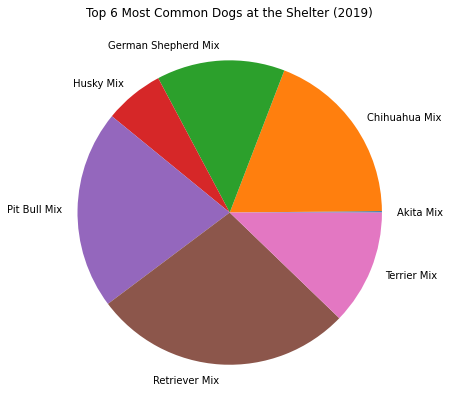

In [16]:
plot = df_2019a.plot.pie(y='Animal ID', figsize=(7, 7), legend=False, label='', title = "Top 6 Most Common Dogs at the \
Shelter (2019)")


#### Knowing that there are many breeds of "Retrievers" and "Terriers", distinctively high number of Pit Bulls, Chihuahuas, German Shepherds, and Huskies coinside with what I have witnessed at many animal shelters.


In [17]:
df_husky = df2[df2['Breed2'] == 'Husky Mix']
df_husky.rename(columns = {"Animal ID":"Husky"}, inplace = True)

C:\Users\junko\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [18]:

df_compare = df_total2.merge(df_husky, on='Year')
df_compare1 = df_compare.set_index('Year')

In [19]:
df_compare2 = df_compare1[['Total', 'Husky']]
df_compare2['% of Husky'] = round(df_compare2['Husky'] / df_compare2['Total'] * 100, 2)
df_compare2

,Total,Husky,% of Husky
Year,,,
2013,1778,28,1.57
2014,7511,141,1.88
2015,7627,155,2.03
2016,7811,140,1.79
2017,7559,176,2.33
2018,7432,254,3.42
2019,8213,334,4.07
2020,3993,207,5.18


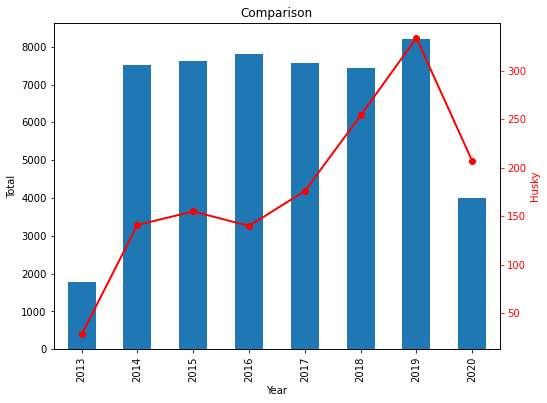

In [20]:
#import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,6))
ax1 = df_compare1['Total'].plot(kind='bar', use_index=True)
ax1.set_title('Comparison')
ax1.set_ylabel('Total')

ax2 = ax1.twinx()
ax2.plot(df_compare1['Husky'].values, linestyle='-', marker='o', linewidth=2, color='r')
ax2.set_ylabel('Husky', color='r')
ax2.tick_params('y', colors='r')

#fig.tight_layout()
plt.show()

### Conclusion: 

#### The chart confirms that there has been a sharp increase in the number of Husky adoption.  

#### As mentioned at the beginning, the numbers for 2003 and 2020 are somewhat questionable.  However, even if we leave out 2013, the number of Husky adoptions more than doubled in just 6 years since 2014.

#### Considering the number of all dog adoptions have not changed much in that same period, I think we can safely say that there is definitely some kind of trend in adopting Huskies.

#### Although we can’t possibly link this trend directly to Game of Thrones without further research, it will be interesting to see if the number of Husky adoption will start to decrease now that the TV show ended in 2019.  I do see a decline in the Husky adoption in 2020, but so did the overall dog adoption.  

#### I found many articles written about a lot of those who adopted Huskies realize Huskies are high maintenance dogs and are abandoning them.  This also happened with Chihuahuas when they become popular with a streak of films and TV commercials around 2000.  It is a sad trend that the people make decisions to adopt animals so lightly.  However, I do have to point out that many of them found a great home because of this trend.   

#### I just hope people will start realizing the issues of overflowing Animal Shelters and take the time to do more research before they adopt a dog (or any other animals).
